In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
rng = np.random.default_rng(seed=42)
m = 200 
X = 2*rng.random((m,1)) 
y = 4 + 3*X + rng.standard_normal((m,1))
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (200, 1)
y shape: (200, 1)


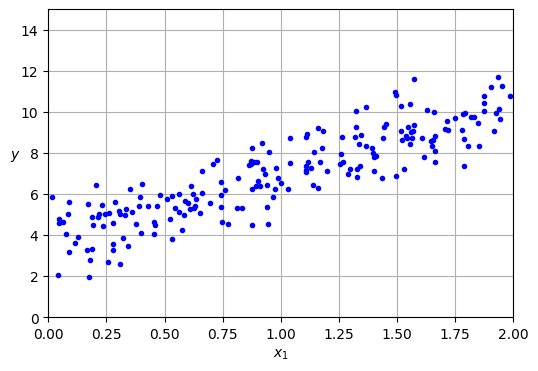

In [3]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.grid()
plt.axis([0,2,0,15])
plt.show()

### Normal Equation
$\hat{\theta} = (X^{\top} X)^{-1} X^{\top} y$



We can directly compute the model parameters with the normal eqn

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
print("X_b shape:",X_b.shape)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(theta_best)

X_b shape: (200, 2)
[[3.69084138]
 [3.32960458]]


In [5]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
print(X_new_b.shape)
y_predict = X_new_b @ theta_best
y_predict

(2, 2)


array([[ 3.69084138],
       [10.35005055]])

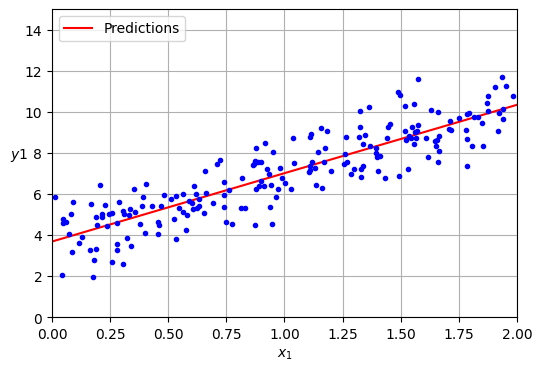

In [6]:
plt.figure(figsize=(6,4))
plt.plot(X_new,y_predict,"r-",label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y1$",rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.coef_,lin_reg.intercept_

(array([[3.32960458]]), array([3.69084138]))

### Gradient Descent
### Batch Gradient Descent

In [8]:
eta = 0.1 
n_epochs = 1000
m = len(X_b)

rng = np.random.default_rng(seed=42)
theta = rng.standard_normal((2,1)) # random initialization

for epoch in range(n_epochs):
    gradients = (2/m) * X_b.T @ (X_b @ theta - y)
    theta -= eta*gradients

print(gradients) 
print(theta)


[[ 5.78009862e-15]
 [-6.21638158e-15]]
[[3.69084138]
 [3.32960458]]


In [9]:
# from math import ceil

# n_epochs = 50
# minibatch_size = 20
# n_batches_per_epoch = ceil(m / minibatch_size)

# rng = np.random.default_rng(seed=42)
# theta = rng.standard_normal((2, 1))  # randomly initialized model parameters

# t0, t1 = 200, 1000  # learning schedule hyperparameters

# def learning_schedule(t):
#     return t0 / (t + t1)

# theta_path_bgd=[]
# theta_path_sgd=[]
# theta_path_mgd = []

# for epoch in range(n_epochs):
#     shuffled_indices = rng.permutation(m)
#     X_b_shuffled = X_b[shuffled_indices]
#     y_shuffled = y[shuffled_indices]
#     for iteration in range(0, n_batches_per_epoch):
#         idx = iteration * minibatch_size
#         xi = X_b_shuffled[idx : idx + minibatch_size]
#         yi = y_shuffled[idx : idx + minibatch_size]
#         gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
#         eta = learning_schedule(epoch * n_batches_per_epoch + iteration)
#         theta = theta - eta * gradients
#         theta_path_mgd.append(theta)

# theta_path_bgd = np.array(theta_path_bgd)
# theta_path_sgd = np.array(theta_path_sgd)
# theta_path_mgd = np.array(theta_path_mgd)

# plt.figure(figsize=(7, 4))
# plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
#          label="Stochastic")
# plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
#          label="Mini-batch")
# plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
#          label="Batch")
# plt.legend(loc="upper left")
# plt.xlabel(r"$\theta_0$")
# plt.ylabel(r"$\theta_1$   ", rotation=0)
# plt.axis([2.7, 4.5, 2.6, 3.7])
# plt.grid()

# plt.show()


### Polynomial Regression

In [10]:
rng = np.random.default_rng(seed=42)
m = 200 
X = 6 * rng.random((m,1)) - 3
print(X.shape)
y = 0.5 * X ** 2 + X + 2 + rng.standard_normal((m,1))
print(y.shape)

(200, 1)
(200, 1)


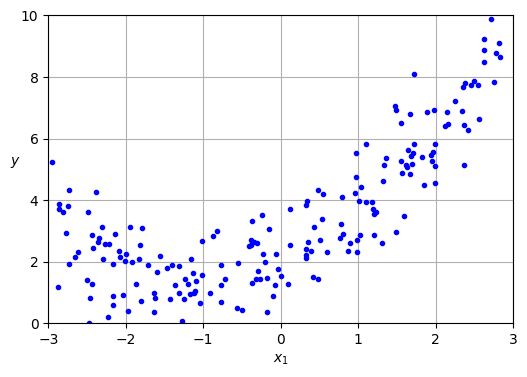

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()

plt.show()


In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
print("X shape:",X.shape)
print("X_poly shape:",X_poly.shape)

X shape: (200, 1)
X_poly shape: (200, 2)


In [13]:
print(X[0])
print(X_poly[0])

[1.64373629]
[1.64373629 2.701869  ]


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.coef_,lin_reg.intercept_

(array([[1.11022126, 0.50526985]]), array([2.00540719]))

(100, 1)
(100, 2)


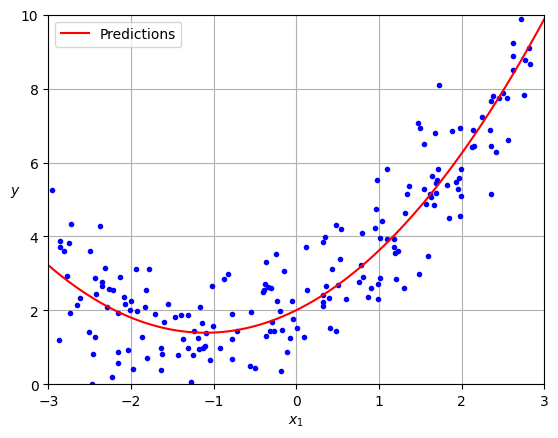

In [15]:
X_new = np.linspace(-3,3,100).reshape(100,1)
print(X_new.shape)
X_new_poly = poly_features.transform(X_new)
print(X_new_poly.shape)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r-',label='Predictions')
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.legend(loc='upper left')
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

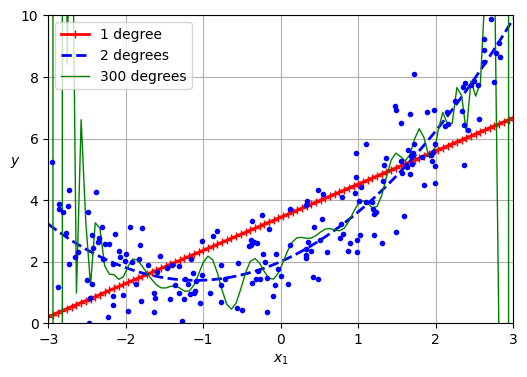

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = make_pipeline(polybig_features,std_scaler,lin_reg)
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()

plt.show()


### Learning curve


In [17]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,valid_scores = learning_curve(
    LinearRegression(),
    X,y,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.01,1.0,40),
    cv=5,
    n_jobs=-1
)


print(train_sizes.shape)
print(train_scores.shape)
print(valid_scores.shape)

(40,)
(40, 5)
(40, 5)


In [18]:
train_errors = -train_scores.mean(axis=-1)
print(train_errors.shape)
valid_errors = -valid_scores.mean(axis=-1)
print(valid_errors.shape)


(40,)
(40,)


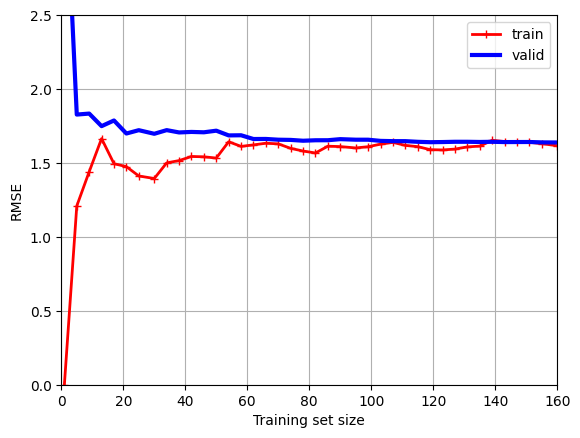

In [19]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 160, 0, 2.5])

plt.show()


This learning curve underfits as it performs poorly on training and validation set

(40,)
(40,)


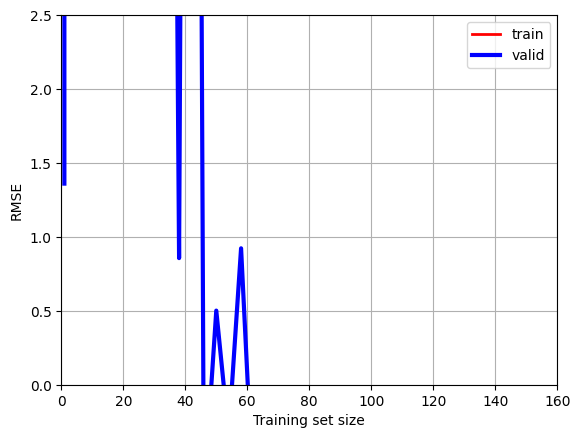

In [21]:
from sklearn.pipeline import make_pipeline 

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10,include_bias=False),
    LinearRegression()
)

train_sizes,train_scores,valid_scores = learning_curve(
    polynomial_regression,
    X,y,
    train_sizes=np.linspace(0.01,1.0,40),
    cv=5,
    n_jobs=-1
)

train_errors = -train_scores.mean(axis=-1)
print(train_errors.shape)
valid_errors = -valid_scores.mean(axis=-1)
print(valid_errors.shape)

plt.plot(train_sizes, train_errors, "r-", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 160, 0, 2.5])

plt.show()


## Regularized Linear Regression 
### Ridge regression 

In [22]:
rng = np.random.default_rng(seed=42)
m = 20 
X = 3*rng.random((m,1))
y = 1 + 0.5 * X + rng.standard_normal((m,1)) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)
print(X_new.shape)
print(y.shape)

(100, 1)
(20, 1)


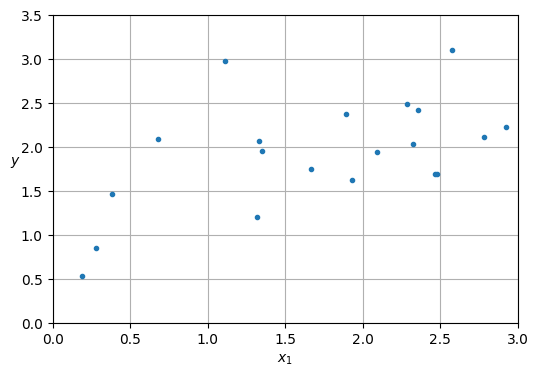

In [23]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'.')
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([0,3,0,3.5])
plt.grid()
plt.show()

In [24]:
from sklearn.linear_model import Ridge 

ridge_reg = Ridge(alpha=0.1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([1.84414523])

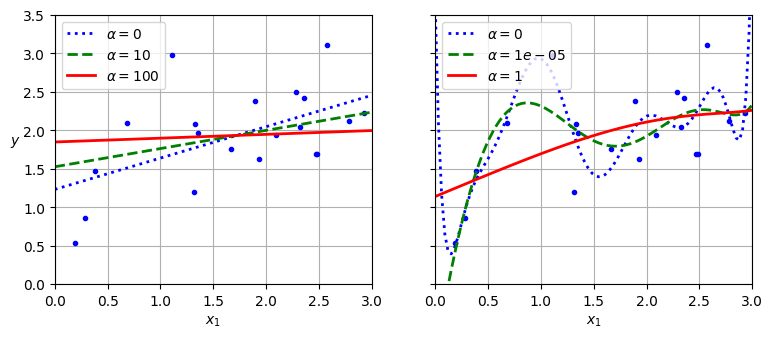

In [25]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [26]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2',alpha=0.1/m,tol=None,
                       max_iter=1000,eta0=0.01,random_state=42)

sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.83659707])